<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/Tema4_Classificaci%C3%B3_Supervisada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 4. Algorismes de classificació i regressió supervisada

- 4.1 Metodologia general
- 4.2 k-propers veïns (kNN)
- 4.3 Anàlisi de discriminants (Gaussian Naïve Bayes,LDA, QDA)
- 4.4 Arbres de decisió

## 4.1 Metodologia general

### 1. Generar dades sintètiques (matriu de dades + etiquetes de classe)

<Figure size 1200x1200 with 0 Axes>

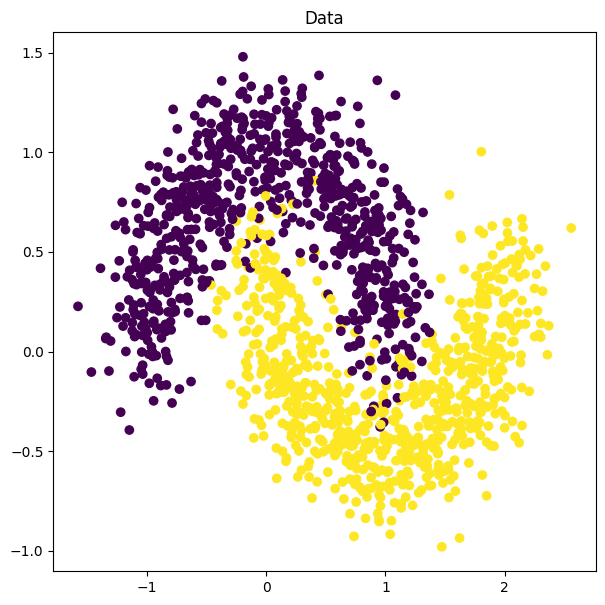

In [1]:
from sklearn.datasets import make_blobs,make_moons
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
# X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
X, y = make_moons(n_samples=n_samples,noise=0.2)

plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data")
plt.show()

In [2]:
X.shape

(1500, 2)

### 2. Dividiu les dades en subconjunts d'entrenament i de prova

In [3]:
from sklearn.model_selection import train_test_split
# split the data with 80% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,train_size=0.8)

In [4]:
Xtrain.shape

(1200, 2)

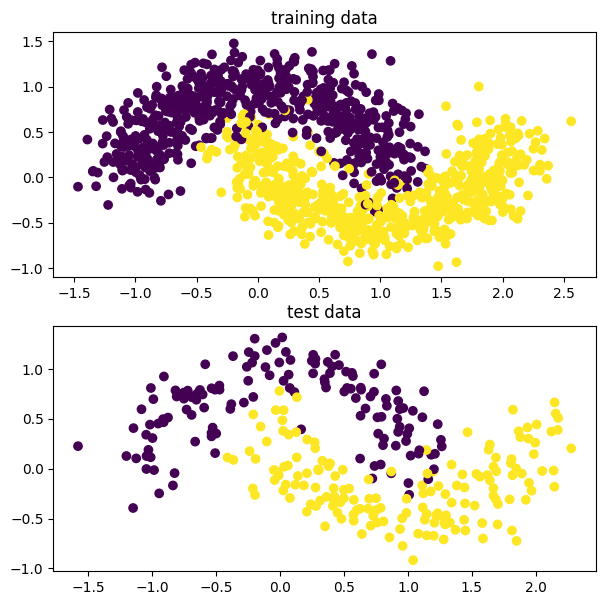

In [5]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1],c=ytrain)
plt.title("training data")

plt.subplot(212)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest)
plt.title("test data")
plt.show()

### 3. Ajustar/entrenar/estimar un model de classificació supervisada

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance') #definir el modelo (parametro k)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(weights='distance')

### 4. Utilitzeu el model de classificació entrenat per predir les etiquetes de classe de prova

In [7]:
ytest_pred = knn.predict(Xtest)

In [8]:
ytest_pred.shape

(300,)

### 5. Visualitzeu prediccions i compareu amb els valors de referència

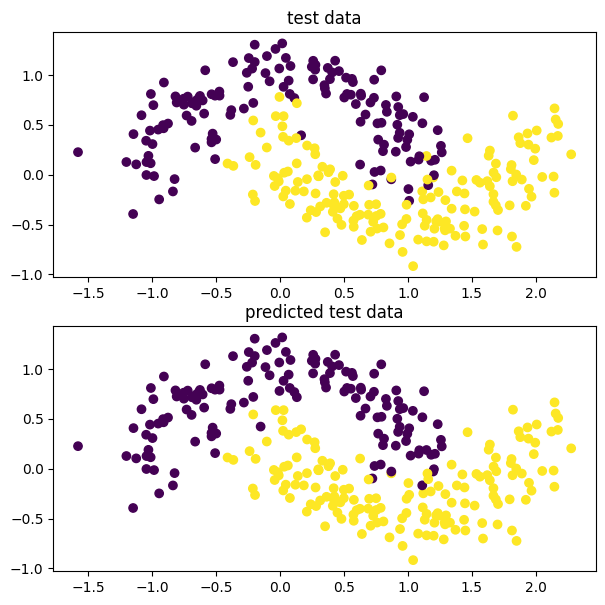

In [9]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(Xtest[:, 0], Xtest[:, 1],c=ytest)
plt.title("test data")

plt.subplot(212)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest_pred)
plt.title("predicted test data")
plt.show()

### 6. Obtenir matriu de confusió

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ytest_pred)

array([[133,   6],
       [  7, 154]])

## 4.2 K-nearest neighbours (KNN)

Algorisme molt senzill: una observació sense etiqueta es classifica assignant l'etiqueta que és més freqüent entre les k mostres d'entrenament més properes a aquest punt (és a dir, els k-èsims veïns més propers).

En l'exemple següent, simplement definim un conjunt de 4 observacions en 1d i les assignem a dues classes (0,1). A continuació, ajusteu el model i prediu la classe de noves observacions mitjançant l'algorisme knn.


In [11]:
import numpy as np

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

print('Training data {}'.format(X))
print('Class labels for training observations {}'.format(y))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
Xnew = np.array([2.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew,knn.predict(Xnew)))
Xnew1 = np.array([0.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew1,knn.predict(Xnew1)))

Training data [[0], [1], [2], [3]]
Class labels for training observations [0, 0, 1, 1]
The knn prediction for observation Xnew= [2.5] is [1]
The knn prediction for observation Xnew= [0.5] is [0]


## 4.3 Anàlisi de discriminants

El teorema de Bayes en el context de la classificació de dades:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
on $\vec{x} = \{x_1,\dots,x_d\}$ és una observació en un espai de característiques d-dimensionals i $\omega_i$ és una etiqueta per a la classe $i$. La distribució $p(\omega_i|\vec{x})$ s'anomena **distribució posterior** i proporciona la probabilitat d'una classe $\omega_i$ condicionada a l'observació de les dades $\vec{x}$. $p(\vec{x}|\omega_i)$ és la **funció de versemblança** i modela la distribució condicional de classe de les observacions. La **distribució a priori** $p(\omega_i)$ descriu l'ocurrència a priori de les diferents classes i pot ser modelada per un expert o per dades de recompte. La **distribució marginal** $p(\vec{x})$ és només una constant de normalització i no és rellevant per a la classificació.

Teoria de la decisió bayesiana: Assigna l'observació $\vec{x}$ a la classe que maximitza la probabilitat posterior $p(\omega_i|\vec{x})$:

\begin{equation*}
\underset{i \in 1,\dots,G}{argmax} \,\,p(\omega_i|\vec{x})
\end{equation*}

Definim la funció discriminant $g_i(\vec{x})$ com:

\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i) + constant
\end{equation*}

Quan totes les classes $G$ tenen probabilitats prèvies iguals $p(\omega_i)=1/G$, la decisió Màxima a Posterior és equivalent a una Màxima Veritat ja que
el posterior és proporcional a la funció de versemblança $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$.

Suposem que les observacions $\vec{x}$ pertanyents a la classe $\omega_i$ es distribueixen segons una normal multivariant d-dimensional $N(\vec{\mu}_i,\Sigma_i)$. Aleshores la probabilitat ve donada per:

\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}}
\exp \{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\}
\end{equation*}

i la funció discriminant $g_i(\vec{x})$ ve donada per:

\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Algorisme de classificació supervisada multiclasse basat en funcions discriminants:

[1] Construeix un **conjunt d'entrenament** d'observacions etiquetades $D_i$ per a cada classe $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
D_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Utilitzeu els conjunts d'entrenament $D_i, \, i=1,\dots,G$ per estimar els paràmetres de la classe $(\mu_i,\Sigma_i)$.

[3] Classifica una nova observació sense etiqueta $\vec{x}_{new}$ a la classe amb funció discriminant màxima:

\begin{equation*}
\underset{i \in 1,\dots,G}{argmax} \,\,g_i(\vec{x}_{nou})
\end{equation*}


Casos límit:

- **Gaussian Naive Bayes (GNB)**: suposa que les matrius de covariància per a cada classe són diagonals, per tant assumint independència entre les característiques. Aleshores la funció de probabilitat de versemblança es factoritza com:

\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_i|\omega_i)
\end{equation*}

 El Gassian Naive Bayes assumeix distribucions normals univariades per a cada característica $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, és a dir.

$p(x_j|\omega_i) = \frac{1}{\sqrt{2\pi\sigma_i}} \exp \{- \frac{(x_j-\mu_i)^2}{2\sigma^2_i} \}$

\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_j|\omega_i) = \frac{\exp \{ -\frac{1}{2}\sum_{j=1 }^d (\frac{x_j-\mu_i}{\sigma_i})^2\}}{(2\pi)^{d/2}\prod_{j=1}^d \sigma_i}
\end{equation*}

La funció discriminant resultant ve donada per

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d ( x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


- **Anàlisi discriminant lineal (LDA)**: suposa que totes les classes comparteixen la mateixa matriu de covariància $\Sigma_i = \Sigma, i=1,\dots G$. La probabilitat i les funcions discriminants vénen donades per:

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\{-\frac{1 }{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log |\Sigma| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = - \frac {1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}


- **Quadratic Discriminant Analysis (QDA)**: el model complet amb matrius de covariància completes per a cada classe. El límit de decisió és quadràtic.

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} \exp\{-\frac{1 }{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = -\frac {1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}



### Gaussian Naïve Bayes (GNB)

Assume that features $x_j$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, the discriminant function $g_i(\vec{x})$ is:

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


#### Naive Bayes with iris dataset


In [12]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

*EXERCICI*: Aplicar el mateix fent traing/test split primer

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.8)

gnb = GaussianNB()
y_pred_test = gnb.fit(Xtrain, ytrain).predict(Xtest)

confusion_matrix(ytest, y_pred_test)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]])

### Linear Discriminant Analysis (LDA)

LDA assumes that the covariance matrix

#### LDA amb dades sintètiques

[1.]
[2.]


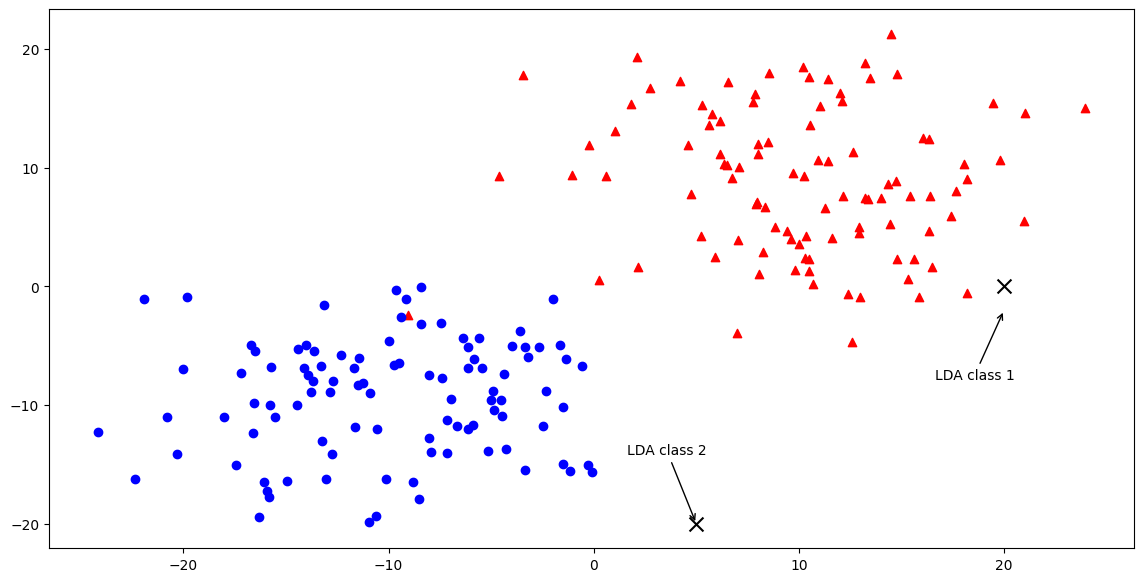

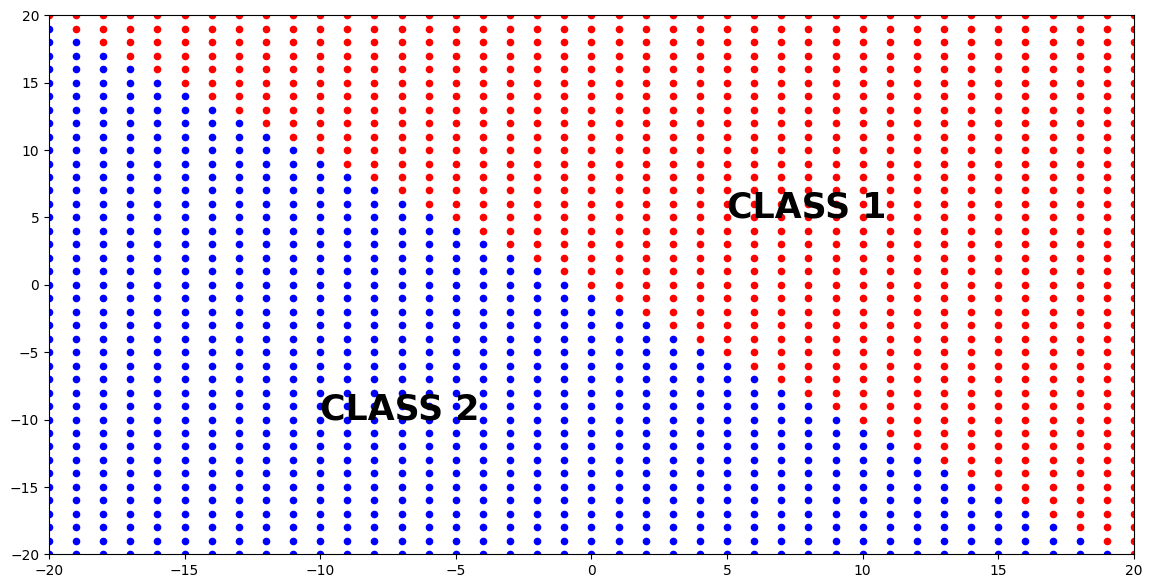

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data:
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model:
clf = LinearDiscriminantAnalysis(priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
plt.scatter(5,-20,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(5,-20),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

#### LDA amb iris
Assumes equal covariance matrices for all the classes

In [21]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

clf_lda = LinearDiscriminantAnalysis(priors=None,store_covariance=True)
clf_lda_trained = clf_lda.fit(iris.data, iris.target)

print('centroides: {}'.format(clf_lda_trained.means_))
print('Matriz de covarianza: {}'.format(clf_lda_trained.covariance_))


centroides: [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Matriz de covarianza: [[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]


In [22]:
clf_lda_trained.covariance_

array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
       [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
       [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.041044  ]])

### Quadratic Discriminant Analysis

#### QDA amb dades sintètiques

[1.]
[2.]


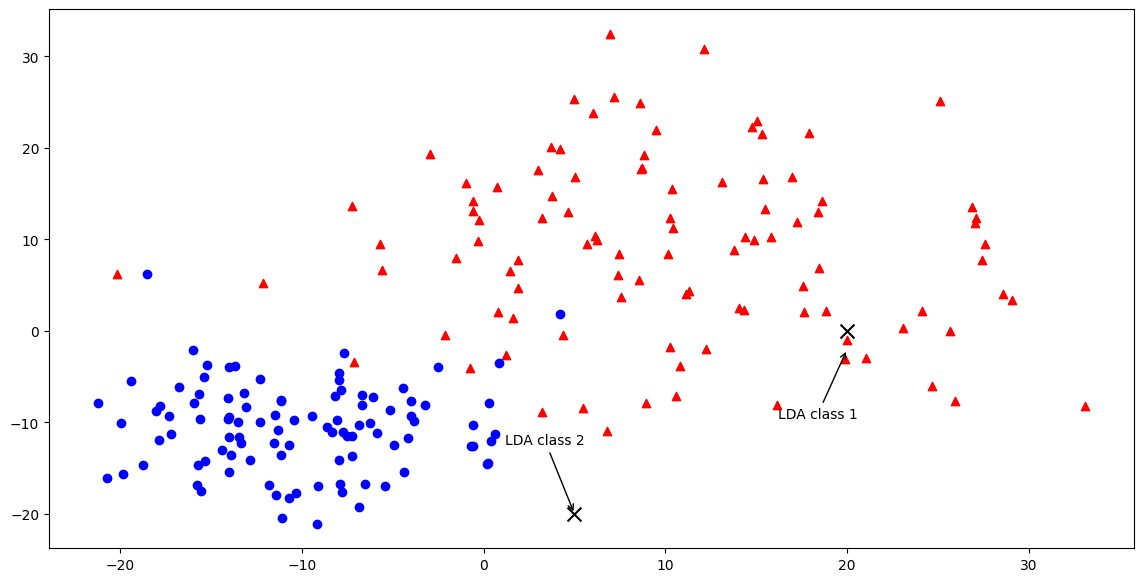

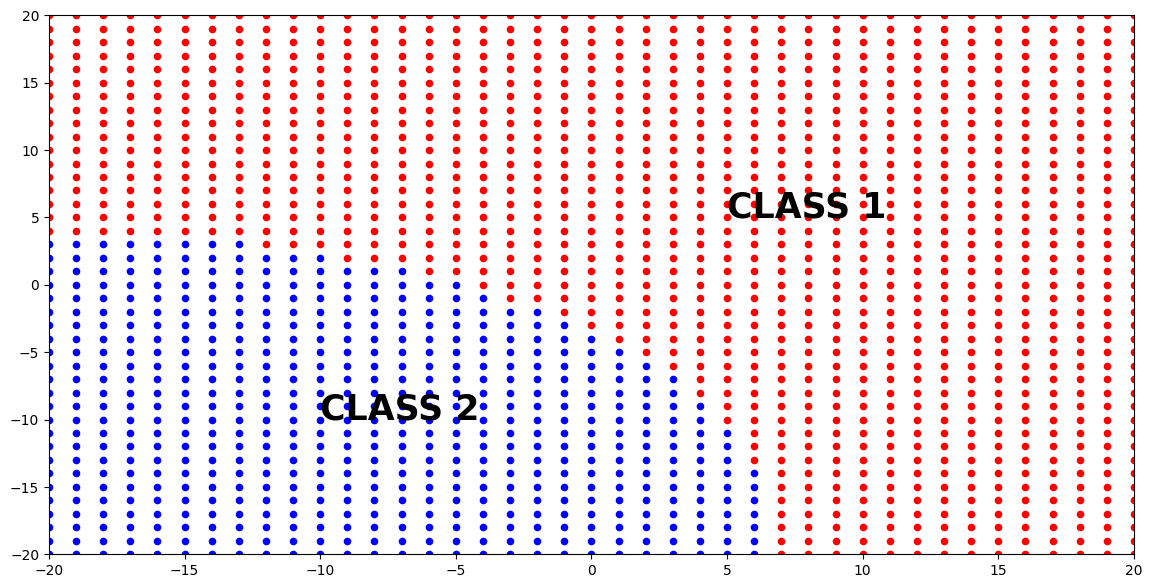

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 10.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data:
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model:
clf = QuadraticDiscriminantAnalysis(priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
plt.scatter(5,-20,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(5,-20),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

#### QDA amb iris:

Does not assume equal covariance matrices for all the classes

In [24]:
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = datasets.load_iris()

clf_qda = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
clf_qda_trained = clf_qda.fit(iris.data, iris.target)

clf_qda_trained.covariance_

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

**EXERCICI**: Aplicar GNB,LDA y QDA a los datos de mpg para predecir el origen de un coche en función de sus atributos numéricos (limpar NaNs, eliminar variables no-numéricas). TRAIN/TEST SPLIT (70-30)

In [25]:
import seaborn as sns

df = sns.load_dataset('mpg') # load data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**EXERCICI**: Ajustar models de classificació (GNB, LDA QDA) amb les dades dels pingüins de l'Antàrtida per fer una predicció de l'espècie de pingüins. Representar les tres matrius de confusió. Utilitzar les mateixes dades d'entrenament i test en els tres models.


Load data

In [ ]:
import seaborn as sns

df = sns.load_dataset('penguins') # load data
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Remove useless variables

In [ ]:
df.drop(['island','sex'],axis=1,inplace=True)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


Remove observations with NaNs

In [ ]:
df.dropna(inplace=True)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


Get features and class labels

In [ ]:
X = df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
y = df['species']

Split train/test

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.7)

Fit the 3 models

In [ ]:
gnb_model = GaussianNB().fit(Xtrain,ytrain)
lda_model = LinearDiscriminantAnalysis(priors=None,store_covariance=True).fit(Xtrain,ytrain)
qda_model = QuadraticDiscriminantAnalysis(priors=None).fit(Xtrain,ytrain)

Predict test data with the 3 models

In [ ]:
y_test_gnb = gnb_model.predict(Xtest)
y_test_lda = lda_model.predict(Xtest)
y_test_qda = qda_model.predict(Xtest)

Calcular les tres matrius de confusió

In [ ]:
cm_gnb = confusion_matrix(ytest, y_test_gnb)
cm_lda = confusion_matrix(ytest, y_test_lda)
cm_qda = confusion_matrix(ytest, y_test_qda)

print('Gaussian Naive Bayes = \n {}'.format(cm_gnb))
print('Linear Discriminant Analysis = \n {}'.format(cm_lda))
print('Quadratic Discriminant Analysis = \n {}'.format(cm_qda))

Gaussian Naive Bayes = 
 [[45  2  0]
 [ 2 19  0]
 [ 0  0 35]]
Linear Discriminant Analysis = 
 [[46  1  0]
 [ 0 21  0]
 [ 0  0 35]]
Quadratic Discriminant Analysis = 
 [[46  1  0]
 [ 0 21  0]
 [ 0  0 35]]


## 4.4 Arbres de decisió

- Classification And Regression Tress (CART): Resoldre problemes tant de regressió com de classificació.

- Creació d'arbres: Partim d'un conjunt d'entrenament d'observacions etiquetades. Les dades es divideixen en nodes fill mitjançant consultes binàries. La consulta a cada divisió es selecciona segons una mesura de la impuresa del node: es diu que un node és pur si totes les observacions tenen la mateixa etiqueta.

- El creixement de l'arbre binari crea un conjunt de límits de decisió lineals que divideixen les dades en diferents grups.



In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
iris = datasets.load_iris()

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data,iris.target)

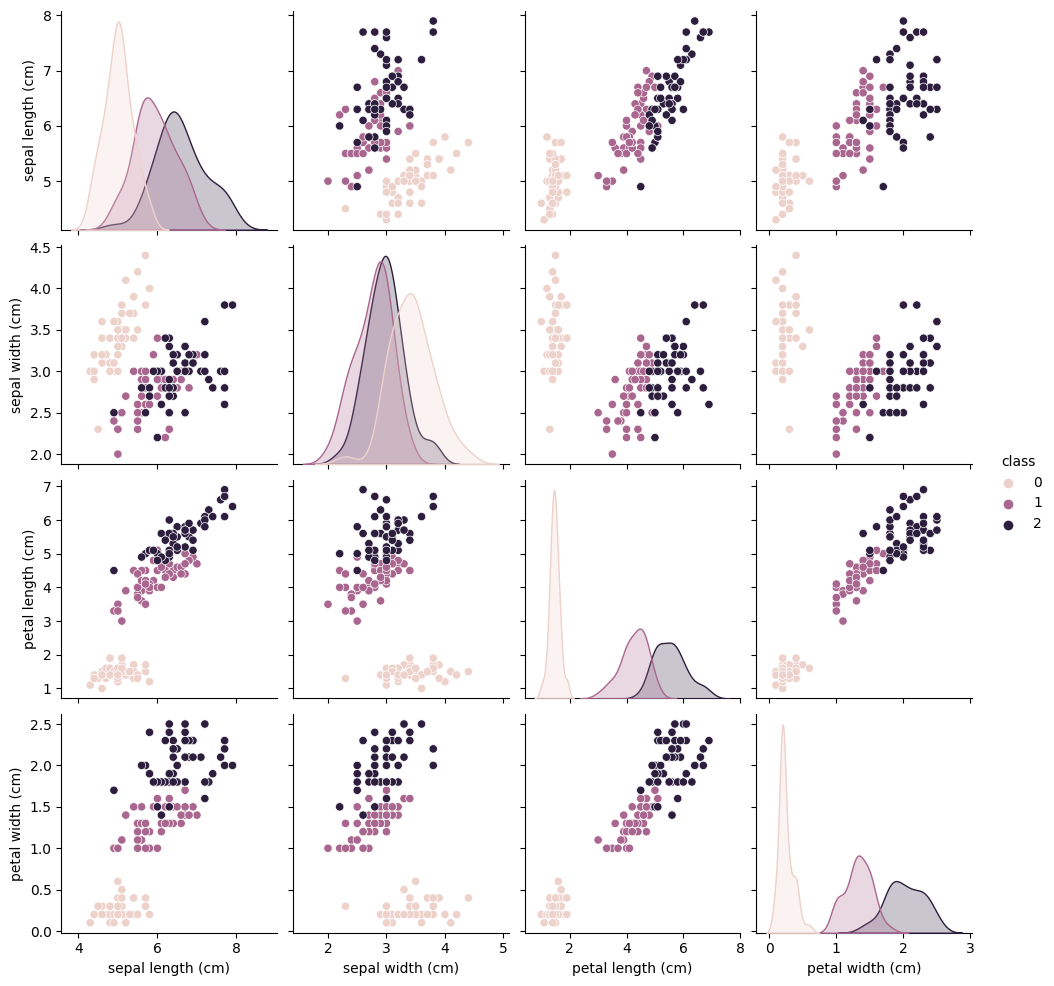

In [27]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['class'] = iris.target
sns.pairplot(df, hue='class')

Representeu l'estructura d'arbre resultant per a les dades de prova:

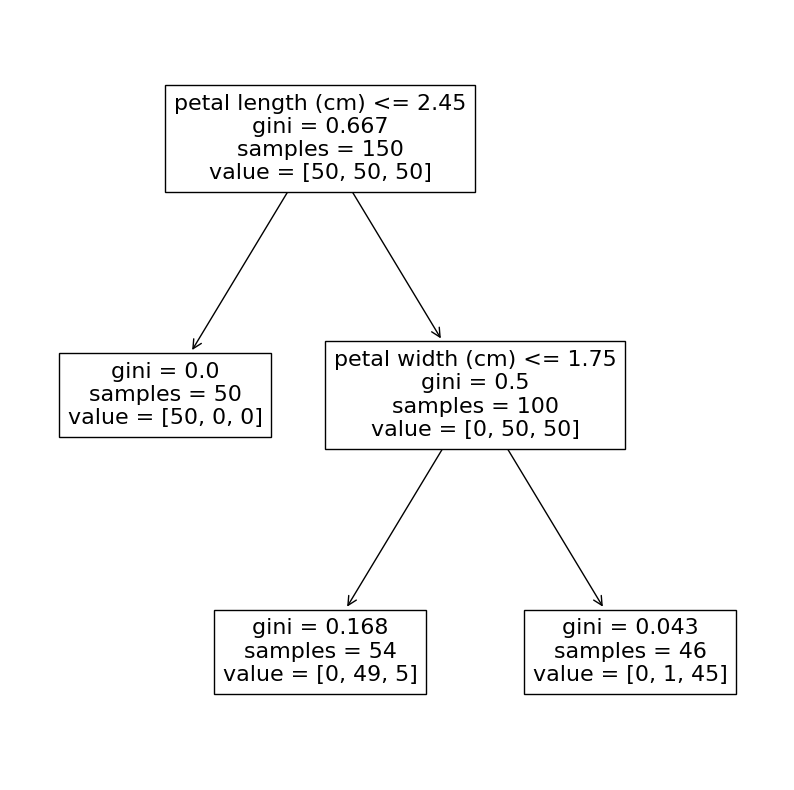

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(clf,feature_names=iris.feature_names)
plt.show()

Representem el límit de decisió de l'arbre en un diagrama de dispersió mutildimensional (característiques numèriques):

<ipython-input-36-3c7ee506f501>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-36-3c7ee506f501>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-36-3c7ee506f501>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-36-3c7ee506f501>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-36-3c7ee506f501>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

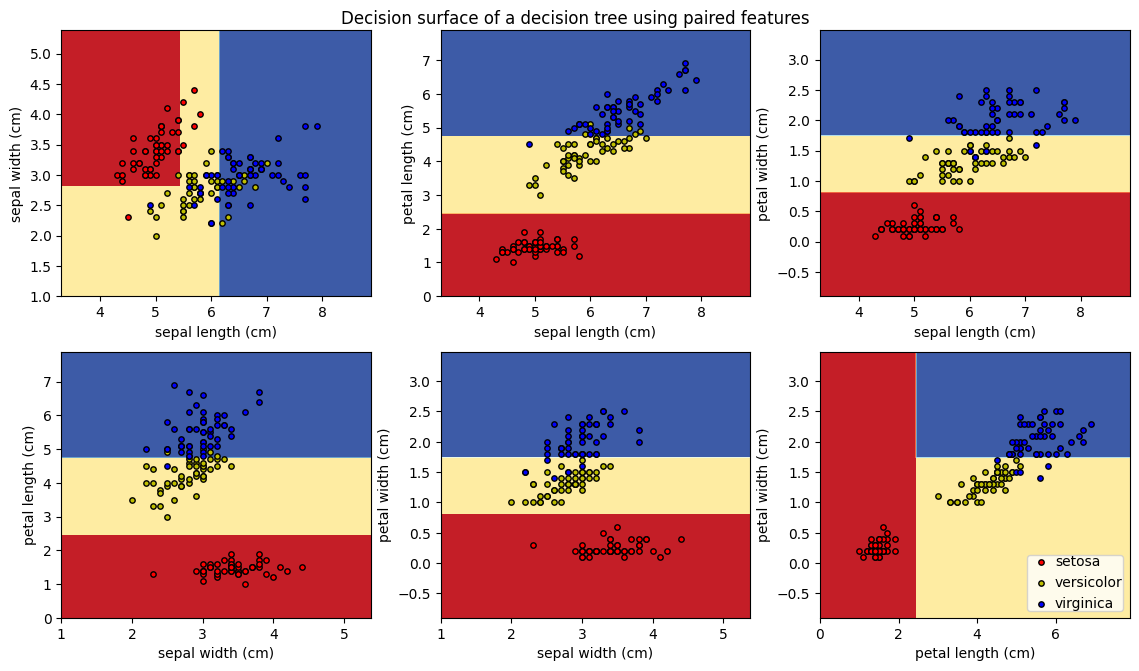

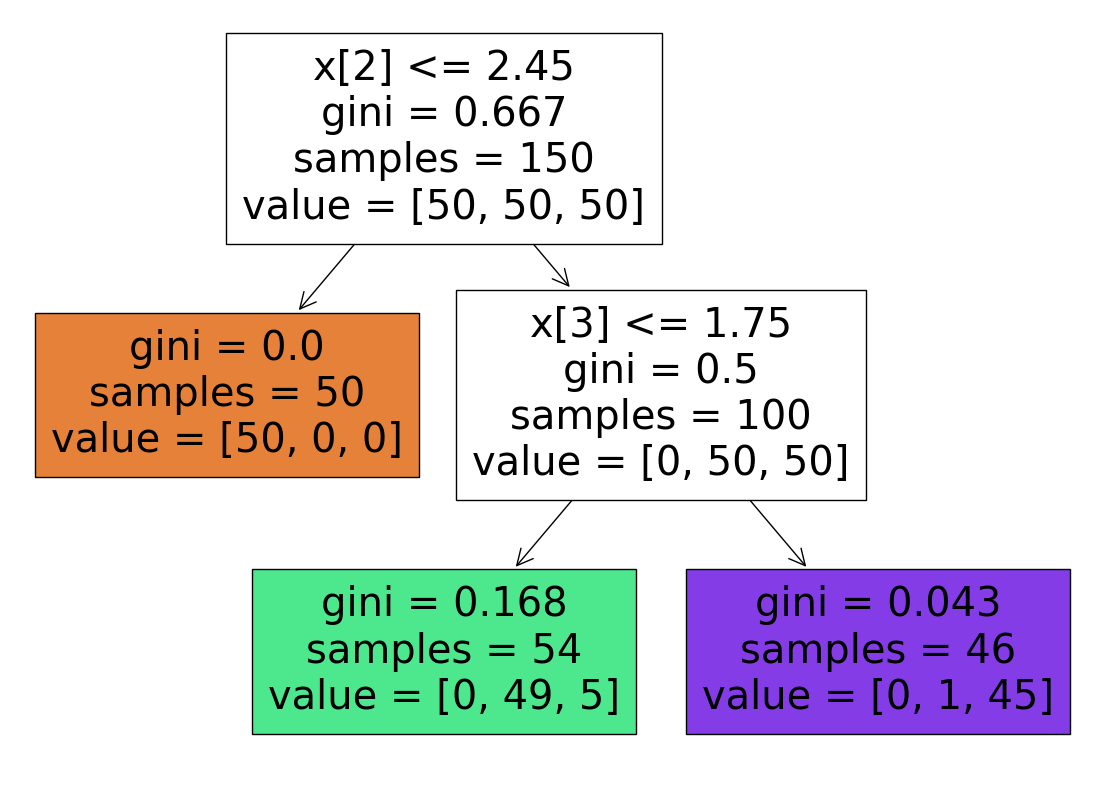

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=2).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier(max_depth=2).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [37]:
y_pred_DT = clf.predict(iris.data)
confusion_matrix(y_pred_DT,iris.target)

array([[50,  0,  0],
       [ 0, 49,  5],
       [ 0,  1, 45]])

## Arbres de regressió

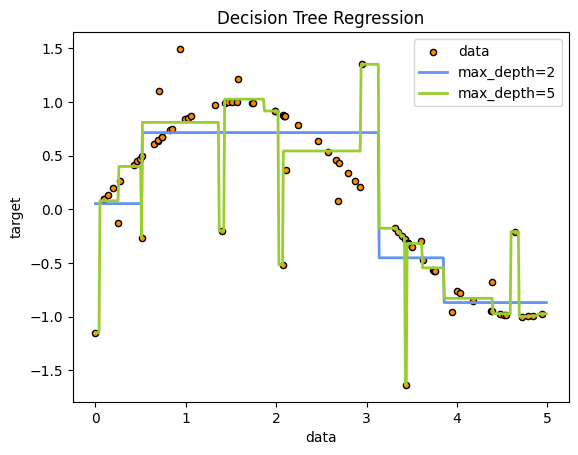

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


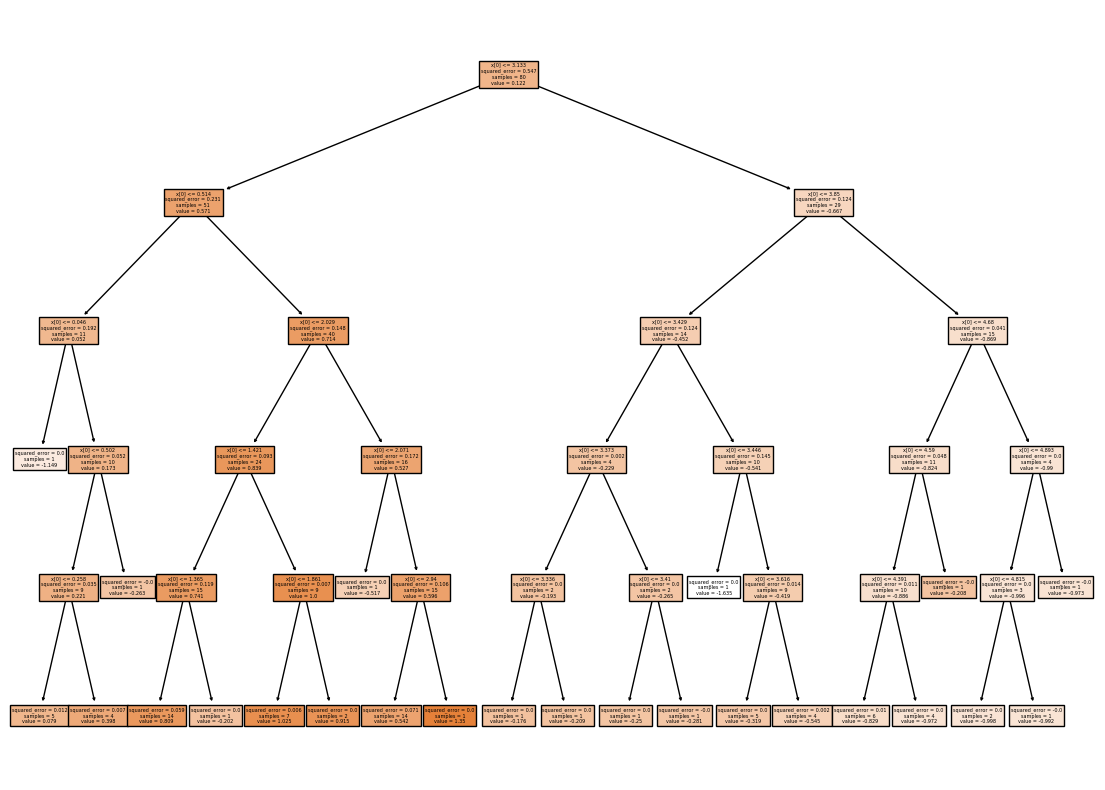

In [ ]:
plt.figure(figsize=(14,10))
plot_tree(regr_2, filled=True)
plt.show()